In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import scipy.stats as stats
import requests
import json
import time
from datetime import datetime
from pprint import pprint
from config import api_key

In [3]:
popular_movies_file_path = "Resources/Popular movies.csv"
genre_movies_file_path = "Resources/Popular movies with genre.csv"

In [4]:
movies = pd.read_csv(popular_movies_file_path, index_col=0)
movie_genre = pd.read_csv(genre_movies_file_path,  index_col=0)

In [5]:
movies.head()

,movie id,overview,popularity rank,release year,title,budget,revenue,actor id,actor name,character,gender
1,169,Ten years after a band of mercenaries first ba...,2,1990,Predator 2,35000000,57120318,1109.0,Kevin Peter Hall,The Predator,Male
2,162,A small suburban town receives a visit from a ...,3,1990,Edward Scissorhands,20000000,53000000,85.0,Johnny Depp,Edward Scissorhands,Male
3,1573,Off-duty cop John McClane is gripped with a fe...,4,1990,Die Hard 2,70000000,240031094,62.0,Bruce Willis,John McClane,Male
4,242,In the midst of trying to legitimize his busin...,5,1990,The Godfather: Part III,54000000,136766062,1158.0,Al Pacino,Don Michael Corleone,Male
5,1669,"A new, technologically-superior Soviet sub, th...",6,1990,The Hunt for Red October,30000000,199200000,7447.0,Alec Baldwin,Jack Ryan,Male


### Gender analysis by years

In [6]:
gender_year = movies[["actor name", "gender", "release year"]]
gender_year_grouped = gender_year.groupby(["release year", "gender"])

gender_year_analysis = gender_year_grouped["gender"].count().reset_index(name="count")
gender_year_analysis_df = pd.DataFrame(gender_year_analysis)

In [7]:
gender_year_analysis_df.head()

,release year,gender,count
0,1990,Female,19
1,1990,Male,76
2,1991,Female,21
3,1991,Male,75
4,1992,Female,22


In [8]:
gender_pivot = pd.pivot_table(gender_year_analysis_df, index=["release year"], columns = "gender", values = "count")
gender_pivot_percent = gender_pivot.div(gender_pivot.sum(1), axis=0)

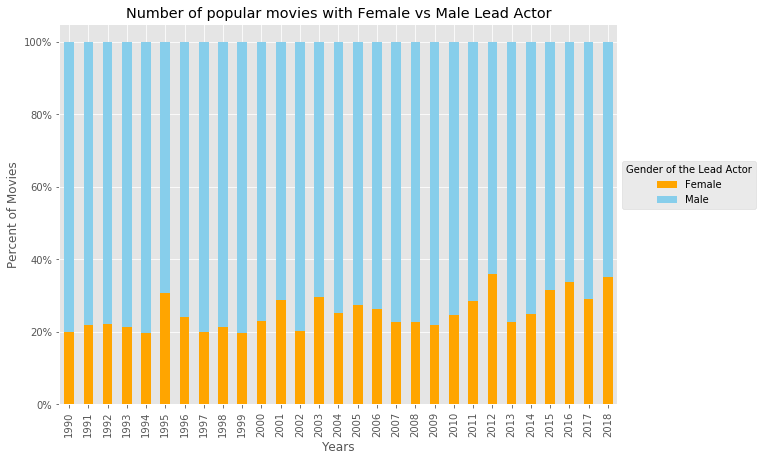

In [9]:
colors = ["orange", "skyblue"]
ax = gender_pivot_percent.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Number of popular movies with Female vs Male Lead Actor")
plt.xlabel("Years")
plt.ylabel("Percent of Movies")
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(y) for y in vals])
plt.legend(loc='lower left',  bbox_to_anchor=(1.0, 0.5), title ="Gender of the Lead Actor")
plt.savefig("Resources/Are movies male centric.png", bbox_inches='tight')
plt.show()

### Gender analysis by genre


In [10]:
movie_genre.head()

,genre,movie id,title
0,Adventure,71805,Shipwrecked
1,Family,71805,Shipwrecked
2,Science Fiction,169,Predator 2
3,Action,169,Predator 2
4,Thriller,169,Predator 2


In [11]:
cast_genre_df = pd.merge(movie_genre[["movie id", "genre"]], 
                         movies[["movie id", "gender", "actor name", "release year"]], 
                         on='movie id', how='inner')
cast_genre_df.head()

,movie id,genre,gender,actor name,release year
0,169,Science Fiction,Male,Kevin Peter Hall,1990
1,169,Action,Male,Kevin Peter Hall,1990
2,169,Thriller,Male,Kevin Peter Hall,1990
3,162,Fantasy,Male,Johnny Depp,1990
4,162,Drama,Male,Johnny Depp,1990


In [12]:
cast_genre_grouped = cast_genre_df.groupby(["genre","gender"])

gender_genre_analysis = cast_genre_grouped["gender"].count().reset_index(name="count")
gender_genre_analysis_df = pd.DataFrame(gender_genre_analysis)
gender_genre_analysis_df.head()

,genre,gender,count
0,Action,Female,128
1,Action,Male,812
2,Adventure,Female,106
3,Adventure,Male,583
4,Animation,Female,93


In [13]:
genre_pivot = pd.pivot_table(gender_genre_analysis_df, index=["genre"], columns = "gender", values = "count")

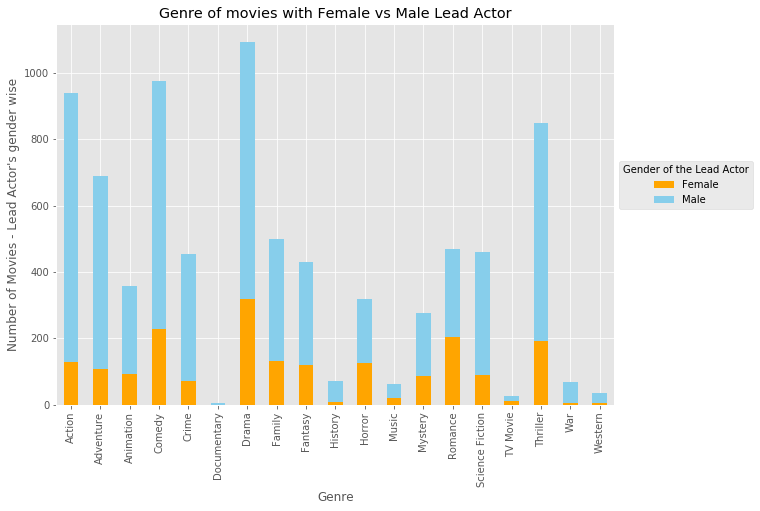

In [14]:
gx = genre_pivot.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Genre of movies with Female vs Male Lead Actor")
plt.xlabel("Genre")
plt.ylabel("Number of Movies - Lead Actor's gender wise")
#vals = gx.get_yticks()
#bx.set_yticklabels(['{:,.0%}'.format(y) for y in vals])
plt.legend(loc='lower left',  bbox_to_anchor=(1.0, 0.5), title ="Gender of the Lead Actor")
plt.savefig("Resources/gender analysis by genre.png", bbox_inches='tight')
plt.show()

In [15]:
genre_pivot_percent  = genre_pivot.div(genre_pivot.sum(1), axis=0)

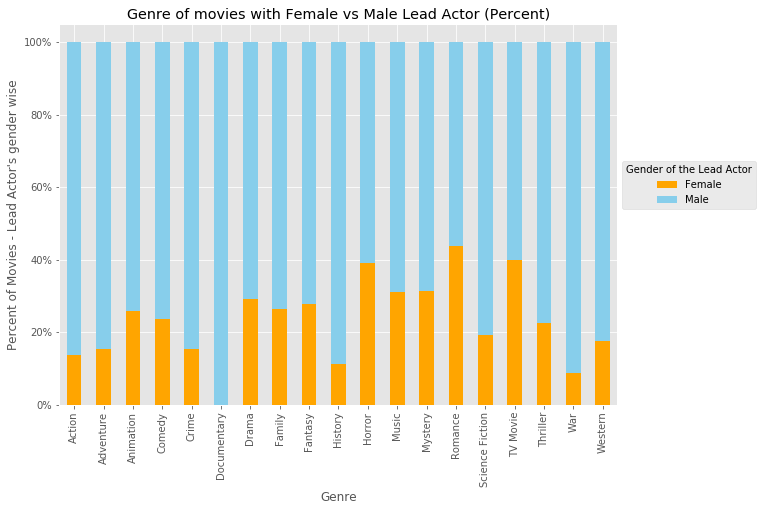

In [16]:
bx = genre_pivot_percent.plot.bar(stacked=True, color = colors, figsize=(10,7))
plt.title("Genre of movies with Female vs Male Lead Actor (Percent)")
plt.xlabel("Genre")
plt.ylabel("Percent of Movies - Lead Actor's gender wise")
vals = bx.get_yticks()
bx.set_yticklabels(['{:,.0%}'.format(y) for y in vals])
plt.legend(loc='lower left',  bbox_to_anchor=(1.0, 0.5), title ="Gender of the Lead Actor")
plt.savefig("Resources/Percent gender analysis by genre.png", bbox_inches='tight')
plt.show()

### Top actors in movies

In [17]:
# Create separate subsets
df_female = movies.loc[movies["gender"]=="Female",:]
df_male = movies.loc[movies["gender"]=="Male",:]

In [18]:
# Find actors with most movies
df_female_top = (pd.DataFrame(df_female["actor name"].value_counts())).rename(columns={"actor name":  "Number of Movies"})
df_female_top.sort_values(by="Number of Movies", ascending=False, inplace=True)
df_female_top = df_female_top.head(5)
df_female_top.reset_index(inplace=True)
df_male_top = (pd.DataFrame(df_male["actor name"].value_counts())).rename(columns={"actor name":  "Number of Movies"})
df_male_top.sort_values(by="Number of Movies", ascending=False, inplace=True)
df_male_top = df_male_top.head(5)
df_male_top.reset_index(inplace=True)

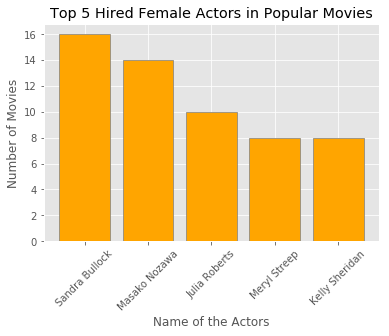

In [19]:
x_ticks = np.arange(0,5,1)
#plt.subplot(1,3,1)
plt.bar(x_ticks,df_female_top["Number of Movies"], align='center', color= "orange", edgecolor='grey',linewidth=0.7)
plt.xticks(x_ticks,df_female_top["index"], rotation=45)
plt.title("Top 5 Hired Female Actors in Popular Movies")
plt.xlabel("Name of the Actors")
plt.ylabel("Number of Movies")
plt.savefig("Resources/Top 5 hired female actors.png", bbox_inches='tight')
plt.figsize=(10,7)

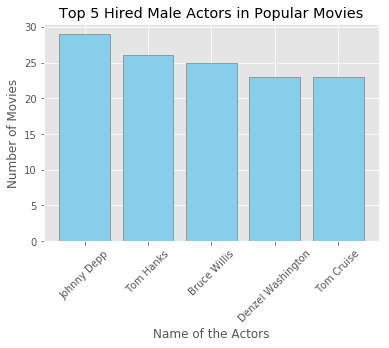

In [20]:
#plt.subplot(1,3,3)
plt.bar(x_ticks,df_male_top["Number of Movies"], align='center', color= "skyblue", edgecolor='grey',linewidth=0.7)
plt.xticks(x_ticks,df_male_top["index"], rotation=45)
plt.title("Top 5 Hired Male Actors in Popular Movies")
plt.xlabel("Name of the Actors")
plt.ylabel("Number of Movies")
plt.savefig("Resources/Top 5 hired male actors.png", bbox_inches='tight')
plt.figsize=(10,7)

### Gender analysis by Budget / Revenue

In [21]:
movies_revenue_analysis = movies[["title", "gender", "release year", "budget", "revenue"]]

In [22]:
# Removing all the movies with incomplete budget or revenue information
movies_revenue_analysis = movies_revenue_analysis[movies["budget"] != 0]
movies_revenue_analysis = movies_revenue_analysis[movies["revenue"] != 0]

In [23]:
# Top grossing movies of the 3 decades
top_grossing_subset = movies_revenue_analysis[["title", "gender", "revenue"]].sort_values("revenue", ascending = False)
top_grossing_movies = top_grossing_subset.head(20).set_index("title")

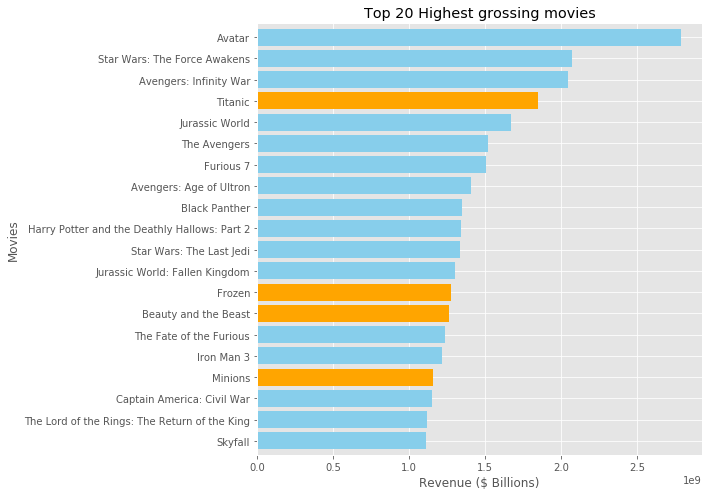

In [34]:
color_code = {"Male": "skyblue", "Female": "orange"}
colors_g = [color_code[gender] for gender in top_grossing_movies["gender"]]
top_grossing_movies["revenue"].plot(kind = "barh", color = colors_g, figsize=(10,7), width=.8)
plt.gca().invert_yaxis()
plt.title("Top 20 Highest grossing movies")
plt.xlabel("Revenue ($ Billions)")
plt.ylabel("Movies")
plt.tight_layout()
plt.savefig("Resources/Top grossing movies.png")
plt.show()

# Hollywood Bias

### Hypothesis test I - Budget

* Hypothesis - If gender of the lead actor is related to budget of the movie, then movie casting male lead actor will have more budget as compared to movie with female lead actor.

* Null Hypothesis - If gender of the lead actor is not related to revenue of the movie, then movie casting male lead actor will not have more budget as compared to movie with female lead actor.

In [25]:
budget_female = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Female"), "budget"]
budget_male = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Male"), "budget"]

In [26]:
(t_stat, p) = stats.ttest_ind(budget_female, budget_male, equal_var=False)
print(f"statistic= {t_stat}, pvalue= {p}")

statistic= -7.86271646027812, pvalue= 1.0887347320163237e-14


In [27]:
if p < 0.05:
    print("The differences between budget allocation on movies for male vs female lead cast are significant.")
else:
    print("The differences between budget allocation on movies for male vs female lead cast are due to chance.")

The differences between budget allocation on movies for male vs female lead cast are significant.


In [28]:
# Report the data
print("The mean revenue of movies with Female lead cast is $ {:,.0f}.".format(budget_female.mean()))
print("The mean revenue of movies with Male lead cast is $ {:,.0f}.".format(budget_male.mean()))
percent_difference = (budget_male.mean() - budget_female.mean())/budget_male.mean()* 100
print("percent difference: {:.0f}%.".format(percent_difference))

The mean revenue of movies with Female lead cast is $ 42,095,964.
The mean revenue of movies with Male lead cast is $ 62,191,940.
percent difference: 32%.


* Plotting the Hypothesis result

In [29]:
means = [budget_female.mean(), budget_male.mean()]
x_axis = np.arange(0, len(means))
sem = [budget_female.sem(), budget_male.sem()]

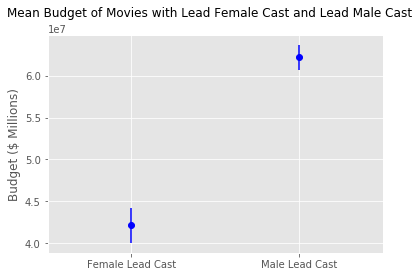

In [30]:
# Plot mean height of players
tick_labels = ["Female Lead Cast", "Male Lead Cast"]
fig, ax = plt.subplots()
fig.suptitle("Mean Budget of Movies with Lead Female Cast and Lead Male Cast",
             fontsize=12)
ax.errorbar(x_axis, means, yerr=sem, fmt="o", color = "b")
ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(tick_labels)
ax.set_xticks([0, 1])
#ax.set_ylim(40000000, 60000000)
ax.set_ylabel("Budget ($ Millions)")
plt.savefig("Resources/Hypothesis 1 graph.png")
plt.show()


### Hypothesis test II - Return on Investment

* Hypothesis - If gender of the lead actor is related to revenue of the movie, then casting male lead actor will lead to more ROI as compared to ROI of movie with female lead actor.
* Null Hypothesis - If gender of the lead actor is not related to revenue of the movie, then casting male lead actor will not lead to more ROI as compared to ROI of movie with female lead actor.

In [31]:
movies_revenue_analysis["ROI"] = movies_revenue_analysis["revenue"]/movies_revenue_analysis["budget"]
ROI_female = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Female"), "ROI"]
ROI_male = movies_revenue_analysis.loc[(movies_revenue_analysis["gender"]=="Male"), "ROI"]

In [32]:
(t_stat, p) = stats.ttest_ind(ROI_female, ROI_male, equal_var=False)
print(f"statistic= {t_stat}, pvalue= {p}")

statistic= 1.2665933877864894, pvalue= 0.20598314507343354


In [33]:
if p < 0.05:
    print("The differences between return on investment on movies for male vs female lead cast are significant.")
else:
    print("There is similar return on investment on movies for male vs female lead cast.")

There is similar return on investment on movies for male vs female lead cast.
